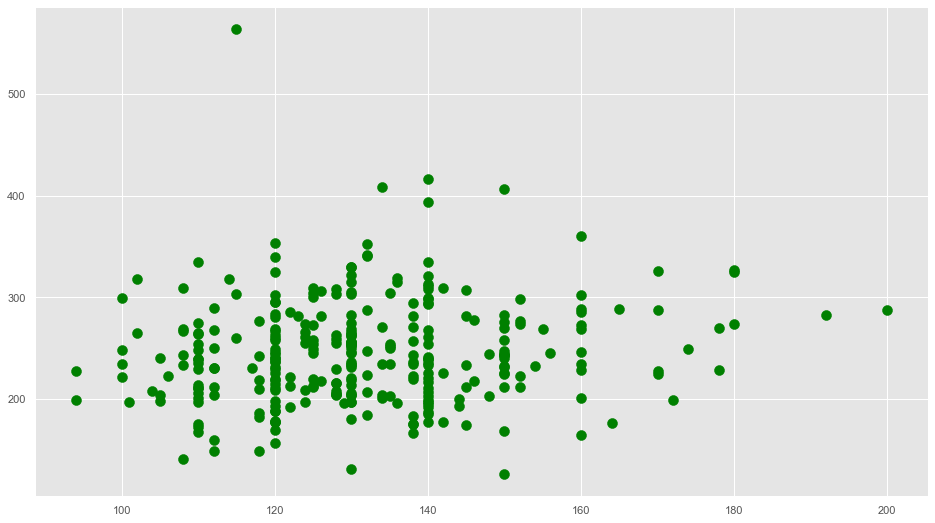

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()  
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

hrt = pd.read_csv('heart.csv')
trest = hrt['trestbps'].values
chol = hrt['chol'].values
X = np.array(list(zip(trest, chol)))
plt.scatter(trest, chol, c='green', s=100)

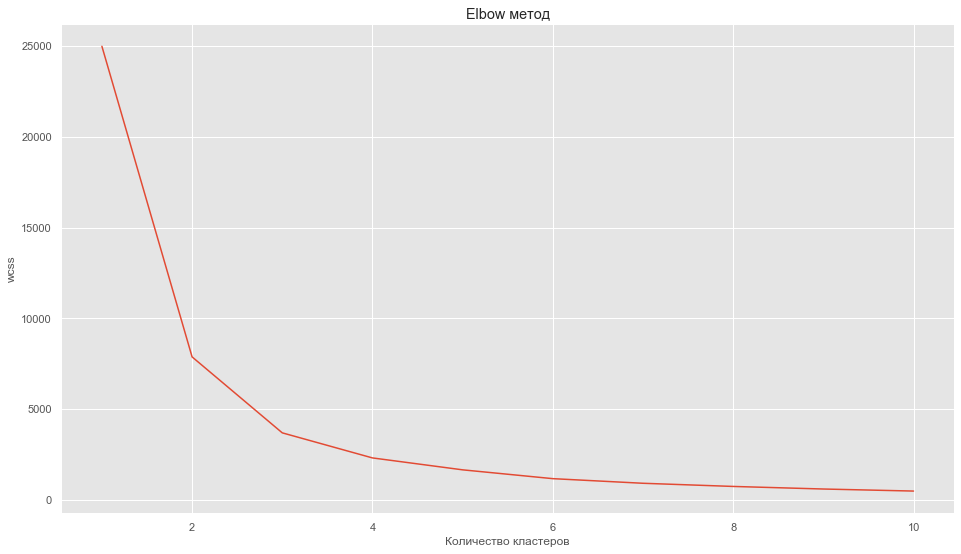

In [2]:
X=hrt.iloc[:,[0,1]].values
#найти идеальное количество кластеров
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow метод')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

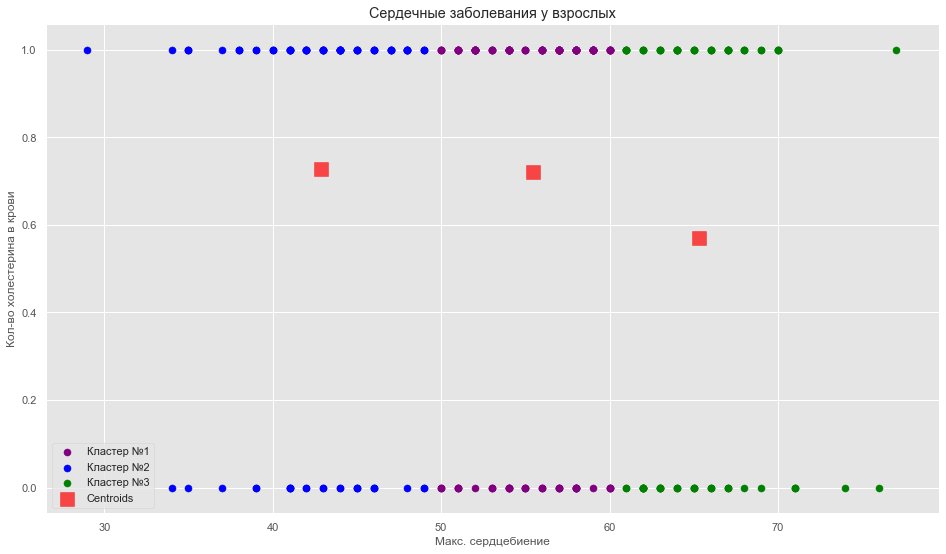

In [3]:
##Подгонка kmeans к набору данных
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
#Визуализация кластеров для k = 3
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Кластер №1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Кластер №2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Кластер №3')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Сердечные заболевания у взрослых')
plt.xlabel('Макс. сердцебиение')
plt.ylabel('Кол-во холестерина в крови')
plt.legend()
plt.show()